<a href="https://colab.research.google.com/github/esteniocouto/DADOS_DESAPARECIDOS_DF/blob/main/trabalho_definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre configuração Graficos**

In [ ]:


import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colormaps

def make_spider(df_plot):

    # Seleciona apenas as colunas numéricas, excluindo a coluna "cluster" e "count"
    num_col = df_plot.select_dtypes(include=['float64', 'int64']).columns.difference(["cluster", "count"])

    n_cols = df_plot['cluster'].unique().shape[0]

    # Normaliza as colunas numéricas
    df_plot.loc[:, num_col] = df_plot[num_col].div(df_plot[num_col].max(axis=0))
    df_plot = df_plot.fillna(0)

    # Seleciona a paleta de cores
    palette = colormaps.get_cmap("Set2")  # Corrigido para aceitar apenas dois argumentos

    # Definir categorias sem a coluna "cluster" e "count"
    categories = list(df_plot[num_col].columns)
    N = len(categories)

    # Ângulos para o gráfico polar
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Configurações da figura
    my_dpi = 96
    fig, axes = plt.subplots(df_plot.shape[0] // n_cols, n_cols, figsize=(1500 / my_dpi, 1500 / my_dpi), dpi=my_dpi, subplot_kw={"projection": "polar"})
    axes = axes.ravel()

    for idx, ax in enumerate(axes):
        color = palette(idx)

        # Seleciona a linha atual
        row = df_plot.iloc[idx]

        # Configurações do gráfico polar
        ax.set_theta_offset(math.pi / 2)
        ax.set_theta_direction(-1)

        ax.set_xticks(angles[:-1], categories, color="grey", size=7)

        ax.set_rlabel_position(0)
        ax.set_yticks([0.33, 0.66, 0.99], ["0.3", "0.6", "1"], color="grey", size=10)
        ax.set_ylim(0, 1)

        # Valores para o gráfico, sem as colunas "cluster" e "count"
        values = row[num_col].values.flatten().tolist()
        values += values[:1]

        # Plotar o gráfico
        ax.plot(angles, values, color=color, linewidth=1.5, linestyle='solid')
        ax.fill(angles, values, color=color, alpha=0.4)

        # Título com o número de registros (coluna "count")
        ax.set_title(f"Persona {row['cluster']} - {int(row['count'])} registros", size=14, color=color, y=1.1)

    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_boxplots(df, columns, outline=True):
    """
    Plota boxplots verticais para variáveis numéricas selecionadas em um DataFrame,
    exibe os valores dos quartis e a média.

    Parâmetros:
    -----------
    df : pandas.DataFrame
        O DataFrame contendo os dados.
    columns : list
        Lista de nomes de colunas que se deseja plotar.
    outline : bool, opcional (default=True)
        Se True, inclui outliers no boxplot.
    """
    # Verificar se as colunas fornecidas são numéricas
    num_columns = [col for col in columns if pd.api.types.is_numeric_dtype(df[col])]

    # Checa se existem colunas numéricas para plotar
    if not num_columns:
        raise ValueError("Nenhuma das colunas fornecidas é numérica.")

    # Criar os boxplots
    plt.figure(figsize=(4, len(num_columns) * 4))  # Ajuste de tamanho baseado no número de colunas

    for i, col in enumerate(num_columns, 1):
        plt.subplot(len(num_columns), 1, i)

        # Criar o boxplot vertical
        sns.boxplot(data=df, y=col, showfliers=outline, orient="v")

        # Calcular os quartis e a média
        quartile_25 = df[col].quantile(0.25)
        quartile_50 = df[col].median()  # ou quantile(0.50)
        quartile_75 = df[col].quantile(0.75)

        # Calcular os limites para os outliers
        iqr = quartile_75 - quartile_25
        lower_bound = quartile_25 - 1.5 * iqr
        upper_bound = quartile_75 + 1.5 * iqr

        # Exibir os limites dos outliers
        plt.text(0, lower_bound, f'Início Outliers Inf: {lower_bound:,.2f}', horizontalalignment='center', color='purple', weight='bold')
        plt.text(0, upper_bound, f'Início Outliers Sup: {upper_bound:,.2f}', horizontalalignment='center', color='purple', weight='bold')


        # Plotar os valores dos quartis e da média
        plt.text(0, quartile_25, f'Q1: {quartile_25:,.2f}', horizontalalignment='center', color='blue', weight='bold')
        plt.text(0, quartile_50, f'Q2 (Mediana): {quartile_50:,.2f}', horizontalalignment='center', color='blue', weight='bold')
        plt.text(0, quartile_75, f'Q3: {quartile_75:,.2f}', horizontalalignment='center', color='blue', weight='bold')

        # Título e rótulo do eixo Y
        plt.title(f'Boxplot de {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
def plot_pie_charts(df, category_col, split_col=None):
    """
    Plota gráficos de pizza. Se `split_col` for fornecido, cria um gráfico de pizza
    para cada valor único em `split_col`, caso contrário, cria um único gráfico de pizza.

    Parâmetros:
    -----------
    df : pandas.DataFrame
        O DataFrame contendo os dados.
    category_col : str
        Nome da coluna com as categorias para serem fatiadas no gráfico de pizza.
    split_col : str, opcional
        Nome da coluna que separará cada gráfico de pizza.
    """
    # Se split_col for None, gerar apenas um gráfico de pizza para a coluna category_col
    if split_col is None:
        counts = df[category_col].value_counts()

        # Criar o gráfico de pizza
        plt.figure(figsize=(5, 5))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
        plt.title(f'Gráfico de pizza para {category_col}', size=14)
        plt.tight_layout()
        plt.show()

    else:
        # Obter os valores únicos da coluna split_col
        split_values = df[split_col].unique()

        # Configurar o tamanho da figura
        fig, axes = plt.subplots(nrows=1, ncols=len(split_values), figsize=(5 * len(split_values), 5))

        # Caso haja apenas um gráfico, convertemos o eixo para uma lista
        if len(split_values) == 1:
            axes = [axes]

        # Gerar um gráfico de pizza para cada valor em split_col
        for i, value in enumerate(split_values):
            ax = axes[i]

            # Filtrar o DataFrame para o valor atual de split_col
            df_filtered = df[df[split_col] == value]

            # Contar as frequências de cada categoria
            counts = df_filtered[category_col].value_counts()

            # Criar o gráfico de pizza
            ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
            ax.set_title(f'{split_col}: {value}', size=14)

        plt.tight_layout()
        plt.show()


import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_bar_chart(df, category_col, split_col=None, stacked = True):
    """
    Plota gráficos de barras empilhadas. Se `split_col` for fornecido, cria um gráfico
    de barras empilhadas para cada valor único em `split_col`, caso contrário, cria um único gráfico.

    Parâmetros:
    -----------
    df : pandas.DataFrame
        O DataFrame contendo os dados.
    category_col : str
        Nome da coluna com as categorias para serem representadas no gráfico.
    split_col : str, opcional
        Nome da coluna que separará cada gráfico de barras empilhadas.
    """
    if split_col is None:
        # Contar as frequências de cada categoria
        counts = df[category_col].value_counts(normalize=True)  # Normalizado para que a barra tenha a mesma altura

        # Criar o gráfico de barras empilhadas
        counts.plot(kind='bar', stacked=stacked, figsize=(7, 5), color=plt.cm.Set2.colors)
        plt.title(f'Gráfico de barras empilhadas para {category_col}', size=14)
        plt.ylabel('Proporção')
        plt.xlabel(category_col)
        plt.tight_layout()
        plt.show()

    else:
        # Pivotar a tabela para calcular as proporções
        df_grouped = df.groupby([split_col, category_col]).size().unstack().fillna(0)

        # Normalizar para que a barra tenha a mesma altura (1)
        df_grouped_norm = df_grouped.div(df_grouped.sum(axis=1), axis=0)

        # Criar o gráfico de barras empilhadas
        df_grouped_norm.plot(kind='bar', stacked=stacked, figsize=(10, 7), color=plt.cm.Set2.colors)

        # Configurar os rótulos e título
        plt.title(f'Gráfico de barras empilhadas para {split_col} e {category_col}', size=14)
        plt.ylabel('Proporção')
        plt.xlabel(split_col)
        plt.tight_layout()
        plt.show()

# DADOS CANDIDATO

**importando os dados dos candidato**

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = 'https://drive.google.com/uc?id=1-5d7L4yfEAJIx8DEwm3B0JHRFiM1DePw'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text), sep=';', encoding='latin-1')
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-1,#NULO#
1,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-1,#NULO#
2,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-1,#NULO#
3,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-1,#NULO#
4,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-1,#NULO#


In [ ]:
df.DS_CARGO.value_counts()

,count
DS_CARGO,
VEREADOR,31672
VICE-PREFEITO,1197
PREFEITO,1142


**MOSTRAR CANDIDATOS A VEREADOR NA CIDADE DE CURITIBA**

In [ ]:
NM_UE = 'CURITIBA'

dfVereadorCuritiba = df[(df.DS_CARGO == 'VEREADOR') & (df.NM_UE == NM_UE)].copy()
dfVereadorCuritiba.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
74,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,172,PUBLICITÁRIO,-1,#NULO#
109,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,125,ADMINISTRADOR,-1,#NULO#
153,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,257,EMPRESÁRIO,-1,#NULO#
190,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,169,COMERCIANTE,-1,#NULO#
291,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO),-1,#NULO#


In [ ]:
display(dfVereadorCuritiba.shape)

(746, 50)

# DADOS BEM CANDIDATO

**importando banco dados dos bens dos candidatos**

In [ ]:
import pandas as pd
url_bem = 'https://drive.google.com/uc?id=1-2AwtO2r1lKY4tUlHPicz8gQ6u2_n9-m'
response_bem = requests.get(url_bem)
dfBem = pd.read_csv(StringIO(response_bem.text), sep=';', encoding='latin-1')
dfBem.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_BEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULT_ATUAL_BEM_CANDIDATO,HH_ULT_ATUAL_BEM_CANDIDATO
0,12/09/2024,19:30:49,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,PR,78352,SALTO DO ITARARÉ,160002341914,1,14,Terra nua,IMÓVEL RURAL EM SALTO DO ITARARÉ,"200000,00",29/08/2024,17:33:11
1,12/09/2024,19:30:49,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,PR,76872,MARIALVA,160002274651,8,14,Terra nua,"66@ LOTE 212-A-2, GLEBA AQUIDABAN, 2,88 ALQUEI...","54435,00",05/09/2024,13:36:07
2,12/09/2024,19:30:49,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,PR,76872,MARIALVA,160002274651,9,14,Terra nua,"LOTE DE TERRAS 4-A, COM AREA DE 5,00 ALQUEIRES...","58000,00",05/09/2024,13:36:07
3,12/09/2024,19:30:49,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,PR,75230,CORBÉLIA,160002340828,4,32,Quotas ou quinhões de capital,QUOTA CAPITAL SICREDI NOSSA TERRA,"2128,09",12/09/2024,10:26:16
4,12/09/2024,19:30:49,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,PR,74470,BARBOSA FERRAZ,160002342771,2,32,Quotas ou quinhões de capital,5% CAPITAL SOCIAL,"500,00",29/08/2024,14:05:45


**mostrando colunas existenstes**

In [ ]:
dfBem.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_BEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULT_ATUAL_BEM_CANDIDATO',
       'HH_ULT_ATUAL_BEM_CANDIDATO'],
      dtype='object')

definir VR_BEM_CANDIDATO como float


In [ ]:
#join entre candidato e bem
print(dfVereadorCuritiba.shape)
print(dfBem.shape)
dfVereadorCuritibaBem = dfVereadorCuritiba.merge(dfBem, on='SQ_CANDIDATO', how='left')
print(dfVereadorCuritibaBem.shape)
dfVereadorCuritibaBem.head()

(746, 50)
(81492, 19)
(2215, 68)


,DT_GERACAO_x,HH_GERACAO_x,ANO_ELEICAO_x,CD_TIPO_ELEICAO_x,NM_TIPO_ELEICAO_x,NR_TURNO,CD_ELEICAO_x,DS_ELEICAO_x,DT_ELEICAO_x,TP_ABRANGENCIA_ELEICAO,...,SG_UF_y,SG_UE_y,NM_UE_y,NR_ORDEM_BEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULT_ATUAL_BEM_CANDIDATO,HH_ULT_ATUAL_BEM_CANDIDATO
0,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,PR,75353.0,CURITIBA,4.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",toyota,"175000,00",06/09/2024,17:53:50
1,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,PR,75353.0,CURITIBA,5.0,61.0,Depósito bancário em conta corrente no País,bradesco,"10,00",06/09/2024,17:53:50
2,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,PR,75353.0,CURITIBA,6.0,61.0,Depósito bancário em conta corrente no País,bb,"10,00",06/09/2024,17:53:50
3,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,PR,75353.0,CURITIBA,3.0,13.0,Terreno,50%,"93708,96",06/09/2024,17:53:50
4,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,PR,75353.0,CURITIBA,1.0,12.0,Casa,25%,"24860,60",06/09/2024,17:53:50


In [ ]:
dfVereadorCuritibaBem['VR_BEM_CANDIDATO'] = dfBem['VR_BEM_CANDIDATO'].str.replace(',', '.').astype(float)


In [ ]:
dfVereadorCuritibaBem.describe()

,ANO_ELEICAO_x,CD_TIPO_ELEICAO_x,NR_TURNO,CD_ELEICAO_x,SG_UE_x,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,...,CD_COR_RACA,CD_OCUPACAO,CD_SIT_TOT_TURNO,ANO_ELEICAO_y,CD_TIPO_ELEICAO_y,CD_ELEICAO_y,SG_UE_y,NR_ORDEM_BEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
count,2215.0,2215.0,2215.0,2215.0,2215.0,2215.0,2.215000e+03,2215.000000,2215.0,2215.0,...,2215.000000,2215.000000,2215.0,1985.0,1985.0,1985.0,1985.0,1985.000000,1985.000000,2.215000e+03
mean,2024.0,2.0,1.0,619.0,75353.0,13.0,1.600021e+11,29898.277652,-4.0,-3.0,...,1.544018,418.679007,-1.0,2024.0,2.0,619.0,75353.0,3.944584,36.849370,1.418475e+05
std,0.0,0.0,0.0,0.0,0.0,0.0,1.144737e+05,15358.149766,0.0,0.0,...,1.026183,335.353865,0.0,0.0,0.0,0.0,0.0,3.531105,25.210844,6.133908e+05
min,2024.0,2.0,1.0,619.0,75353.0,13.0,1.600019e+11,10000.000000,-4.0,-3.0,...,1.000000,101.000000,-1.0,2024.0,2.0,619.0,75353.0,1.000000,2.000000,0.000000e+00
25%,2024.0,2.0,1.0,619.0,75353.0,13.0,1.600020e+11,20000.000000,-4.0,-3.0,...,1.000000,169.000000,-1.0,2024.0,2.0,619.0,75353.0,1.000000,19.000000,6.000000e+03
50%,2024.0,2.0,1.0,619.0,75353.0,13.0,1.600021e+11,27127.000000,-4.0,-3.0,...,1.000000,257.000000,-1.0,2024.0,2.0,619.0,75353.0,3.000000,21.000000,3.000000e+04
75%,2024.0,2.0,1.0,619.0,75353.0,13.0,1.600022e+11,40166.000000,-4.0,-3.0,...,2.000000,581.000000,-1.0,2024.0,2.0,619.0,75353.0,5.000000,61.000000,1.000000e+05
max,2024.0,2.0,1.0,619.0,75353.0,13.0,1.600024e+11,77999.000000,-4.0,-3.0,...,6.000000,999.000000,-1.0,2024.0,2.0,619.0,75353.0,23.000000,99.000000,1.700000e+07


In [ ]:
print(dfVereadorCuritibaBem.shape)
print(dfBem.shape)
print(dfVereadorCuritiba.shape)

(2215, 68)
(81492, 19)
(746, 50)


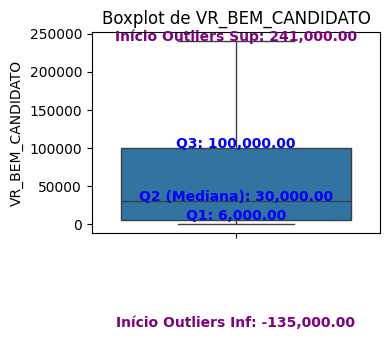

In [ ]:
# Chamando a função
columns = ['VR_BEM_CANDIDATO']
plot_boxplots(dfVereadorCuritibaBem, columns, outline=False)


In [ ]:
# Define a function to categorize assets
def categorize_assets(asset):
    if 'veículo' in asset.lower() or 'moto' in asset.lower() or 'aeronave' in asset.lower() or 'embarcação' in asset.lower():
        return 'BENS MÓVEIS'
    elif 'casa' in asset.lower() or 'terreno' in asset.lower() or 'apartamento' in asset.lower() or 'prédio' in asset.lower() or 'loja' in asset.lower() or 'terra nua' in asset.lower():
        return 'BENS IMÓVEIS'
    elif 'poupança' in asset.lower() or 'renda fixa' in asset.lower() or 'cdb' in asset.lower() or 'rdb' in asset.lower():
        return 'INVESTIMENTOS RENDA FIXA'
    elif 'ações' in asset.lower() or 'fundo' in asset.lower() or 'investimento' in asset.lower() or 'mercado' in asset.lower():
        return 'INVESTIMENTOS RENDA VARIÁVEL'
    elif 'dinheiro' in asset.lower() or 'depósito bancário' in asset.lower() or 'numerário' in asset.lower():
        return 'DINHEIRO'
    else:
        return 'OUTROS BENS'


In [ ]:

# Apply the function to categorize the assets
dfVereadorCuritibaBem['Categoria_BEM'] = dfBem['DS_TIPO_BEM_CANDIDATO'].apply(categorize_assets)



In [ ]:
dfVereadorCuritibaBem.Categoria_BEM.value_counts()

,count
Categoria_BEM,
OUTROS BENS,955
INVESTIMENTOS RENDA VARIÁVEL,682
BENS MÓVEIS,393
BENS IMÓVEIS,185


In [ ]:
dfVereadorCuritibaBem[['SQ_CANDIDATO', 'Categoria_BEM', 'VR_BEM_CANDIDATO']].head(20)

,SQ_CANDIDATO,Categoria_BEM,VR_BEM_CANDIDATO
0,160002155483,BENS IMÓVEIS,200000.00
1,160002155483,BENS IMÓVEIS,54435.00
2,160002155483,BENS IMÓVEIS,58000.00
3,160002155483,OUTROS BENS,2128.09
4,160002155483,OUTROS BENS,500.00
5,160002155483,BENS IMÓVEIS,1000000.00
6,160002152008,OUTROS BENS,22053.76
7,160002152008,BENS IMÓVEIS,187000.00
8,160002152008,BENS IMÓVEIS,17625.00
9,160002073983,BENS IMÓVEIS,15500.00


**CRIANDO DO DF_PIVOT, E SOMANDO OS VALORES DA COLUNA VR_BEM_CANDIDATO**

In [ ]:
df_pivot = dfVereadorCuritibaBem.pivot_table(
    index='SQ_CANDIDATO',
    columns='DS_TIPO_BEM_CANDIDATO',
    values='VR_BEM_CANDIDATO',
    aggfunc='sum'
)


**NORMALIZAÇÃO DOS VALORES "NAN" SUBSTITUINDO POR "0", E CRIANDO A COLUNA TOTAL_BENS COM A SOMA DE TODOS OS BENS**

In [ ]:
df_pivot.fillna(0, inplace=True)
#dfBem_pivot.head(5)
#Criar uma coluna Total Bens em df_pivot
df_pivot['Total_Bens'] = df_pivot.sum(axis=1)
df_pivot.head(5)

DS_TIPO_BEM_CANDIDATO,Apartamento,"Aplicação de renda fixa (CDB, RDB e outros)",Ações (inclusive as provenientes de linha telefônica),Bem relacionado com o exercício da atividade autônoma,Benfeitorias,Caderneta de poupança,Casa,Construção,Consórcio não contemplado,Crédito decorrente de empréstimo,...,Poupança para construção ou aquisição de bem imóvel,Prédio comercial,Quotas ou quinhões de capital,Sala ou conjunto,Terra nua,Terreno,Título de clube e assemelhado,VGBL - Vida Gerador de Benefício Livre,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",Total_Bens
SQ_CANDIDATO,,,,,,,,,,,,,,,,,,,,,
160001910370,0.0,0.0,0.0,0.0,0.0,19500.00,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29500.00
160001910371,800000.0,0.0,0.0,35000.0,0.0,80154.91,70000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005230.18
160001910372,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0,800000.00
160001910374,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0,15000.00
160001910376,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000.0,82000.00


**CATEGORIZANDO O DF_PIVOT ATRAVES DA COLUNA TOTAL_BENS**

In [ ]:
df_pivot.sort_values(by='Total_Bens', ascending=False).head(10)


DS_TIPO_BEM_CANDIDATO,Apartamento,"Aplicação de renda fixa (CDB, RDB e outros)",Ações (inclusive as provenientes de linha telefônica),Bem relacionado com o exercício da atividade autônoma,Benfeitorias,Caderneta de poupança,Casa,Construção,Consórcio não contemplado,Crédito decorrente de empréstimo,...,Poupança para construção ou aquisição de bem imóvel,Prédio comercial,Quotas ou quinhões de capital,Sala ou conjunto,Terra nua,Terreno,Título de clube e assemelhado,VGBL - Vida Gerador de Benefício Livre,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",Total_Bens
SQ_CANDIDATO,,,,,,,,,,,,,,,,,,,,,
160002023034,267778.44,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,17714842.08
160002018584,6767.77,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,16220000.00,16336767.77
160002135753,0.00,200000.0,0.0,0.0,0.0,123920.70,35201.55,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,120000.0,0.0,0.0,7558067.98,8191437.99
160002168960,600000.00,0.0,0.0,0.0,0.0,37500.00,0.00,0.0,0.0,0.0,...,0.0,0.0,5345000.00,0.0,0.0,0.0,0.0,0.0,0.00,7582500.00
160001910385,51815.72,0.0,0.0,0.0,0.0,42816.91,5149950.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,33530.9,0.0,0.0,1770000.00,7330060.35
160002351787,0.00,100000.0,23500.0,0.0,0.0,60000.00,750000.00,0.0,0.0,77600.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,53533.00,6115633.00
160002068260,0.00,0.0,0.0,0.0,0.0,0.00,120000.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1800000.00,6020000.00
160002152944,157851.20,0.0,0.0,0.0,0.0,5286233.17,40000.00,0.0,0.0,0.0,...,0.0,0.0,57955.21,10000.0,0.0,0.0,0.0,0.0,1136.95,5553176.53
160002351790,4432710.74,0.0,0.0,0.0,0.0,750000.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,250000.00,5432710.74


In [ ]:
# Aplicar o logaritmo na coluna 'Total_Bens'
df_pivot['Total_Bens_Log'] = np.log1p(df_pivot['Total_Bens'])


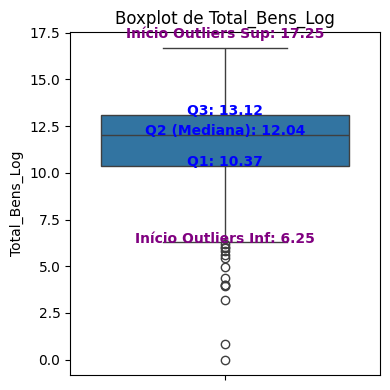

In [ ]:
columns = ['Total_Bens_Log']
plot_boxplots(df_pivot, columns, outline=True)

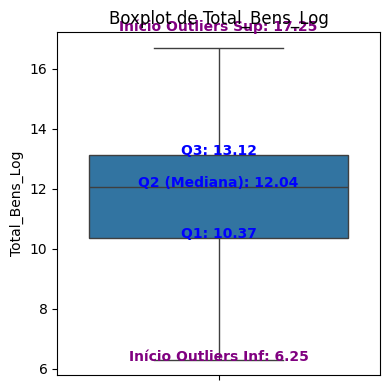

In [ ]:
plot_boxplots(df_pivot, columns, outline=False)

In [ ]:
#join entre candidato e bem
print(dfVereadorCuritiba.shape)
print(df_pivot.shape)
dfVereadorCuritibaBem = dfVereadorCuritiba.merge(df_pivot, on='SQ_CANDIDATO', how='left')
print(dfVereadorCuritibaBem.shape)
dfVereadorCuritibaBem.head()

(746, 50)
(516, 42)
(746, 92)


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,Prédio comercial,Quotas ou quinhões de capital,Sala ou conjunto,Terra nua,Terreno,Título de clube e assemelhado,VGBL - Vida Gerador de Benefício Livre,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",Total_Bens,Total_Bens_Log
0,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,0.0,0.0,0.0,0.0,2128.09,0.0,0.0,200000.0,1315063.09,14.089396
1,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,187000.0,226678.76,12.331294
2,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,10000.0,10618.64,9.270460
4,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,100000.0,465000.00,13.049795


In [ ]:
dfVereadorCuritibaBem.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'Apartamento',
       'Aplicação de renda f

In [ ]:
#Calcular a idade do candidato na DT_ELEICAO
dfVereadorCuritibaBem['DT_ELEICAO'] = pd.to_datetime(dfVereadorCuritibaBem['DT_ELEICAO'], format='%d/%m/%Y')
dfVereadorCuritibaBem['DT_NASCIMENTO'] = pd.to_datetime(dfVereadorCuritibaBem['DT_NASCIMENTO'], format='%d/%m/%Y')
dfVereadorCuritibaBem['IDADE'] = (dfVereadorCuritibaBem['DT_ELEICAO'] - dfVereadorCuritibaBem['DT_NASCIMENTO']).dt.days // 365
dfVereadorCuritibaBem[['DT_NASCIMENTO','IDADE']].head(30)


,DT_NASCIMENTO,IDADE
0,1968-05-13,56
1,1962-08-14,62
2,1976-05-10,48
3,1968-07-08,56
4,1972-02-13,52
5,1995-10-24,28
6,1967-08-03,57
7,1980-10-28,43
8,1974-06-07,50
9,1977-06-15,47


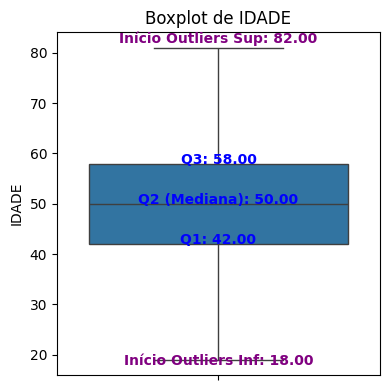

In [ ]:
columns = ['IDADE']
plot_boxplots(dfVereadorCuritibaBem, columns, outline=True)

In [ ]:
dfVereadorCuritibaBem[['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO','IDADE', 'Total_Bens']].sort_values(by='Total_Bens', ascending=False).head(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,IDADE,Total_Bens
196,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,2024-10-06,MUNICIPAL,PR,75353,CURITIBA,13,VEREADOR,160002023034,36999,BRUNO PELLEGRINO DA ROCHA ROSSI,32,17714842.08
444,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,2024-10-06,MUNICIPAL,PR,75353,CURITIBA,13,VEREADOR,160002018584,20333,MOISES SOARES PAULA,44,16336767.77
128,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,2024-10-06,MUNICIPAL,PR,75353,CURITIBA,13,VEREADOR,160002135753,55655,GILBERTO PIRES DOS SANTOS,50,8191437.99
270,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,2024-10-06,MUNICIPAL,PR,75353,CURITIBA,13,VEREADOR,160002168960,43021,FELIPE MOREIRA PETRI,40,7582500.00
213,12/09/2024,19:30:50,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,2024-10-06,MUNICIPAL,PR,75353,CURITIBA,13,VEREADOR,160001910385,40166,HAROLDO RODRIGUES FERREIRA,79,7330060.35


# **SALVANDO DADOS EM UMA NOVA BASE DADOS**

In [ ]:
dfVereadorCuritibaBem.to_csv('vereadorcuritibabem.csv', index=False)

In [ ]:
dfVereadorCuritibaBem[['SQ_CANDIDATO','NM_CANDIDATO','SG_PARTIDO', 'NM_UE','IDADE', 'Total_Bens','Total_Bens_Log' ]].sort_values(by='Total_Bens', ascending=False).head(30)


,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,NM_UE,IDADE,Total_Bens,Total_Bens_Log
196,160002023034,BRUNO PELLEGRINO DA ROCHA ROSSI,AGIR,CURITIBA,32,17714842.08,16.689913
444,160002018584,MOISES SOARES PAULA,PODE,CURITIBA,44,16336767.77,16.608929
128,160002135753,GILBERTO PIRES DOS SANTOS,PSD,CURITIBA,50,8191437.99,15.918600
270,160002168960,FELIPE MOREIRA PETRI,PV,CURITIBA,40,7582500.00,15.841354
213,160001910385,HAROLDO RODRIGUES FERREIRA,PSB,CURITIBA,79,7330060.35,15.807494
679,160002351787,JOFRE DAMASIO,CIDADANIA,CURITIBA,62,6115633.00,15.626359
258,160002068260,LUIZ CARLOS DE OLIVEIRA RUELA,PRD,CURITIBA,54,6020000.00,15.610598
49,160002152944,ARIANE REGIS SILVA DE ASSIS,NOVO,CURITIBA,44,5553176.53,15.529881
48,160002351790,DANIEL DA SILVA,CIDADANIA,CURITIBA,43,5432710.74,15.507949
714,160002068232,ROBSON CLEIBER DE LIMA,PRD,CURITIBA,48,4919793.74,15.408777


In [ ]:
# prompt: usando a coluna "SG_PARTIDO" da base de dados dfVereadorCuritibaBem faça um agrupamento mostre a quantidade

partido_counts = dfVereadorCuritibaBem.groupby('SG_PARTIDO')['SG_PARTIDO'].count()
print(partido_counts)


SG_PARTIDO
AGIR             30
CIDADANIA        19
DC               40
MDB              39
MOBILIZA         23
NOVO             39
PC do B           2
PDT              33
PL               39
PMB              40
PODE             35
PP               39
PRD              41
PRTB             36
PSB              37
PSD              40
PSDB             20
PSOL             18
PT               31
PV                6
REDE             21
REPUBLICANOS     40
SOLIDARIEDADE    39
UNIÃO            39
Name: SG_PARTIDO, dtype: int64


#**Escolha das variaveis**


In [ ]:
dfVereadorCuritibaBem.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'Apartamento',
       'Aplicação de renda f

In [ ]:
# prompt: usando a base de dados dfVereadorCuritibaBem agrupe e conte a colunas CD_GRAU_INSTRUCAO e  DS_GRAU_INSTRUCAO e print

instrucao_counts = dfVereadorCuritibaBem.groupby(['CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO'])['CD_GRAU_INSTRUCAO'].count()
instrucao_counts.head(10)


,,CD_GRAU_INSTRUCAO
CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,
2,LÊ E ESCREVE,8
3,ENSINO FUNDAMENTAL INCOMPLETO,20
4,ENSINO FUNDAMENTAL COMPLETO,31
5,ENSINO MÉDIO INCOMPLETO,31
6,ENSINO MÉDIO COMPLETO,193
7,SUPERIOR INCOMPLETO,91
8,SUPERIOR COMPLETO,372


In [ ]:
# prompt: me de um codigo que mostre o a quantidade de vezes que cada ocupação da coluna DS_OCUPACAO aparece, dentro do df  dfVereadorCuritibaBem e imprima as 10 primeiras linhas

occupation_counts = dfVereadorCuritibaBem['DS_OCUPACAO'].value_counts()
print(occupation_counts.head(10))


DS_OCUPACAO
OUTROS                                             178
EMPRESÁRIO                                          99
ADVOGADO                                            45
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                31
VEREADOR                                            26
ADMINISTRADOR                                       23
SERVIDOR PÚBLICO MUNICIPAL                          20
COMERCIANTE                                         19
PROFESSOR DE ENSINO MÉDIO                           17
CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES     17
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle


colunasSelecionadas = [
      'IDADE',
      'CD_GRAU_INSTRUCAO',
      'Total_Bens_Log'
]

#Atribuir 0 onde estiver NaN
dfVereadorCuritibaBem.fillna(0, inplace=True)

scaler = StandardScaler()
dfVereadorCuritibaBemPadronizada = scaler.fit_transform(dfVereadorCuritibaBem[colunasSelecionadas])

#Salvar o scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#Atualizar o dataframe com as variaveis padronizadas, alterando os seus nomes com algum sufixo
dfVereadorCuritibaBemPadronizada = pd.DataFrame(dfVereadorCuritibaBemPadronizada, columns=[coluna + '_PADRONIZADA' for coluna in colunasSelecionadas])
dfVereadorCuritibaBemPadronizada.head()


,IDADE_PADRONIZADA,CD_GRAU_INSTRUCAO_PADRONIZADA,Total_Bens_Log_PADRONIZADA
0,0.543157,0.802512,1.063276
1,1.071214,0.802512,0.754135
2,-0.160918,0.802512,-1.414172
3,0.543157,-0.619516,0.215925
4,0.191120,0.802512,0.880475


In [ ]:
#Criar a lista com os nomes das variaveis padronizadas
colunasSelecionadasPadronizadas = [coluna + '_PADRONIZADA' for coluna in colunasSelecionadas]
colunasSelecionadasPadronizadas

['IDADE_PADRONIZADA',
 'CD_GRAU_INSTRUCAO_PADRONIZADA',
 'Total_Bens_Log_PADRONIZADA']

In [ ]:
#concatenar os dois dataframes (normal e padronizada)
dfVereadorCuritibaBemPadronizada = pd.concat([dfVereadorCuritibaBem, dfVereadorCuritibaBemPadronizada], axis=1)
dfVereadorCuritibaBemPadronizada.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'Apartamento',
       'Aplicação de renda f

In [ ]:
dfVereadorCuritibaBemPadronizada[['CD_GRAU_INSTRUCAO', 'CD_GRAU_INSTRUCAO_PADRONIZADA']].describe()

,CD_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO_PADRONIZADA
count,746.000000,7.460000e+02
mean,6.871314,4.047998e-17
std,1.407385,1.000671e+00
min,2.000000,-3.463573e+00
25%,6.000000,-6.195164e-01
50%,7.000000,9.149781e-02
75%,8.000000,8.025121e-01
max,8.000000,8.025121e-01


In [ ]:
dfVereadorCuritibaBemPadronizada[['IDADE', 'IDADE_PADRONIZADA']].describe()

,IDADE,IDADE_PADRONIZADA
count,746.000000,7.460000e+02
mean,49.828418,2.381175e-17
std,11.370044,1.000671e+00
min,19.000000,-2.713191e+00
25%,42.000000,-6.889745e-01
50%,50.000000,1.510081e-02
75%,58.000000,7.191761e-01
max,81.000000,2.743393e+00


In [ ]:
colunasSelecionadasPadronizadas

['IDADE_PADRONIZADA',
 'CD_GRAU_INSTRUCAO_PADRONIZADA',
 'Total_Bens_Log_PADRONIZADA']

# **KMeans**

In [ ]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que df_cluster é o seu DataFrame
df_cluster = dfVereadorCuritibaBemPadronizada.copy()

col_corte = colunasSelecionadasPadronizadas

# Listas para armazenar as somas dos quadrados dentro dos clusters (WCSS) e o coeficiente de silhouette
wcss = []
silhouette_scores = []

maxCluster = 30
# Testando k de 2 a maxCluster
for i in tqdm(range(2, maxCluster)):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=10,
                    max_iter=1000, tol=1e-8)
    kmeans.fit(df_cluster[col_corte])

    # Adicionando a inércia (WCSS)
    wcss.append(kmeans.inertia_)



100%|██████████| 28/28 [00:02<00:00, 13.18it/s]


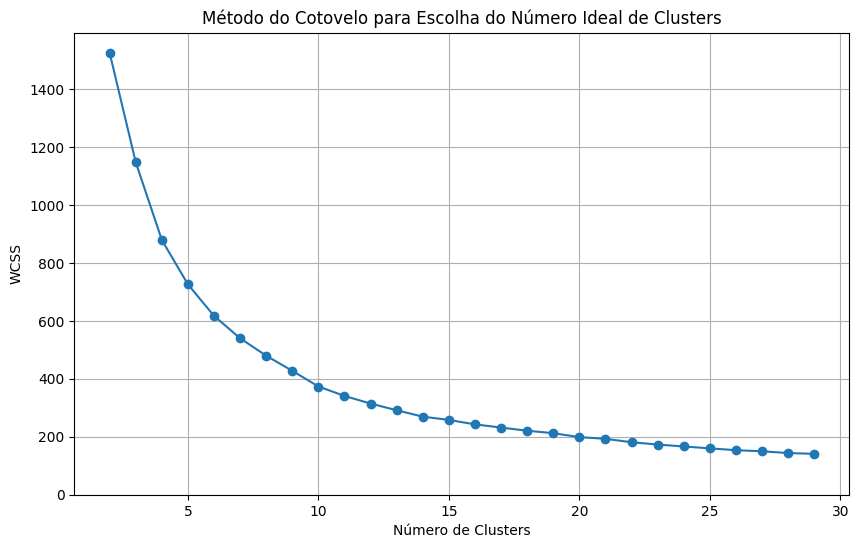

In [ ]:

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(2, maxCluster), wcss, marker='o')
plt.title('Método do Cotovelo para Escolha do Número Ideal de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.ylim(ymin=0)
plt.grid(True)
plt.show()


O melhor número de clusters (cotovelo) é: 4


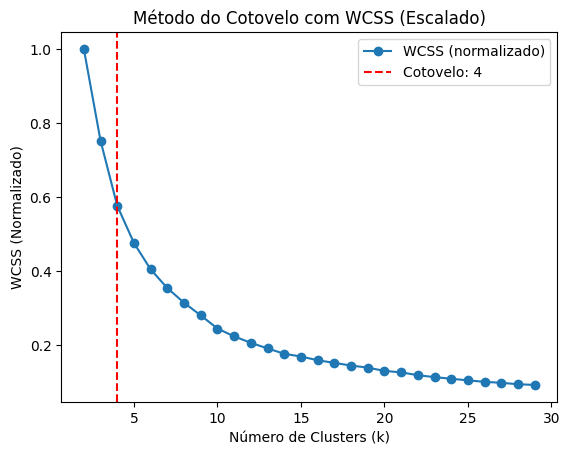

In [ ]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans


# Supondo que você já tenha calculado a lista wcss
# Lista para armazenar os ângulos formados entre os pontos
angles = []

# Função para calcular o ângulo entre três pontos (P1, P2, P3)
def calculate_angle(p1, p2, p3):
    # Vetores entre os pontos
    v1 = np.array([p1[0] - p2[0], p1[1] - p2[1]])  # Vetor P1 -> P2
    v2 = np.array([p3[0] - p2[0], p3[1] - p2[1]])  # Vetor P3 -> P2

    # Produto escalar e normas
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Ângulo em radianos, com clip para evitar erros numéricos
    return np.degrees(angle)  # Convertendo para graus

# Usando os valores de WCSS já calculados
nmaxCluster = len(wcss)
k_values = range(2, nmaxCluster)

# Normalizando os valores de WCSS para a mesma escala do eixo X
wcss_scaled = np.array(wcss) / max(wcss)

# Calculando os ângulos entre cada três pontos consecutivos usando os valores normalizados
for i in range(1, len(wcss_scaled) - 3):
    p1 = (k_values[i - 1], wcss_scaled[i - 1])
    p2 = (k_values[i], wcss_scaled[i])
    p3 = (k_values[i + 1], wcss_scaled[i + 1])

    angle = calculate_angle(p1, p2, p3)
    angles.append(angle)

# Identificando o ponto com o menor ângulo (cotovelo)
elbow_index = np.argmin(angles) + 3  # +3 por causa do offset dos k_values
print(f"O melhor número de clusters (cotovelo) é: {elbow_index}")

# Plotando o gráfico com o ponto de cotovelo destacado
plt.plot(range(2, maxCluster), wcss_scaled, marker='o', label='WCSS (normalizado)')
plt.axvline(x=elbow_index, color='red', linestyle='--', label=f'Cotovelo: {elbow_index}')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Normalizado)')
plt.title('Método do Cotovelo com WCSS (Escalado)')
plt.legend()
plt.show()

In [ ]:
angles

[176.06485334220565,
 175.76383473913464,
 178.34531107155448,
 178.8145553459236,
 179.36715483589956,
 179.6913436553839,
 179.92398070707864,
 179.19016812347402,
 179.76845593828952,
 179.87745449675685,
 179.9584669692267,
 179.60000600612037,
 179.84971602144049,
 179.83494110910036,
 179.99916045958045,
 179.90684883193873,
 179.80539474423296,
 179.70842103948942,
 179.77969191265524,
 179.8597868933173,
 179.95052526264968,
 179.99409182270279,
 179.98852929466003,
 179.91121846915917]

In [ ]:
dfVereadorCuritibaBemPadronizada.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'Apartamento',
       'Aplicação de renda f

In [ ]:

df_cluster = dfVereadorCuritibaBemPadronizada[colunasSelecionadas+colunasSelecionadasPadronizadas+['Total_Bens']].copy()

#df_cluster = dfVereadorCuritibaBemPadronizada.copy()



i = 4 #número do corte
kmeans = KMeans(n_clusters = i, random_state = 42, init = 'k-means++', n_init = 10,
                max_iter=10000, tol = 1e-8)
kmeans.fit(df_cluster[col_corte])

df_cluster["cluster"] = kmeans.predict(df_cluster[col_corte])
# Define os novos nomes para os clusters
novos_nomes = {'A': 'herdeiros', 'B': 'indigentes', 'C': 'ineptos', 'D': 'senhorios'}
df_cluster["cluster"] = [chr(x+65) for x in df_cluster.cluster]

# Substitui os nomes dos clusters
df_cluster["cluster"] = df_cluster["cluster"].replace(novos_nomes)


df_cluster_info = df_cluster.groupby("cluster").median().reset_index()
df_cluster_count = df_cluster.groupby("cluster").count()[col_corte[0]].reset_index()
df_cluster_count.columns = ["cluster", "count"]

df_cluster_table = pd.merge(df_cluster_info, df_cluster_count, how="left", on="cluster")
df_cluster_table

#concatene apenas a coluna "cluster" do df_cluster ao dfVereadorCuritibaBemPadronizada
dfVereadorCuritibaBemPadronizadaCluster = pd.concat([dfVereadorCuritibaBemPadronizada, df_cluster["cluster"]], axis=1)
#dfVereadorCuritibaBemPadronizadaCluster.columns

In [ ]:
df_cluster_info

,cluster,IDADE,CD_GRAU_INSTRUCAO,Total_Bens_Log,IDADE_PADRONIZADA,CD_GRAU_INSTRUCAO_PADRONIZADA,Total_Bens_Log_PADRONIZADA,Total_Bens
0,herdeiros,43.0,8.0,12.095147,-0.600965,0.802512,0.712611,179000.00
1,indigentes,48.0,7.0,0.000000,-0.160918,0.091498,-1.414172,0.00
2,ineptos,56.0,4.0,8.752357,0.543157,-2.041545,0.124823,6500.00
3,senhorios,58.0,8.0,12.331294,0.719176,0.802512,0.754135,226678.76


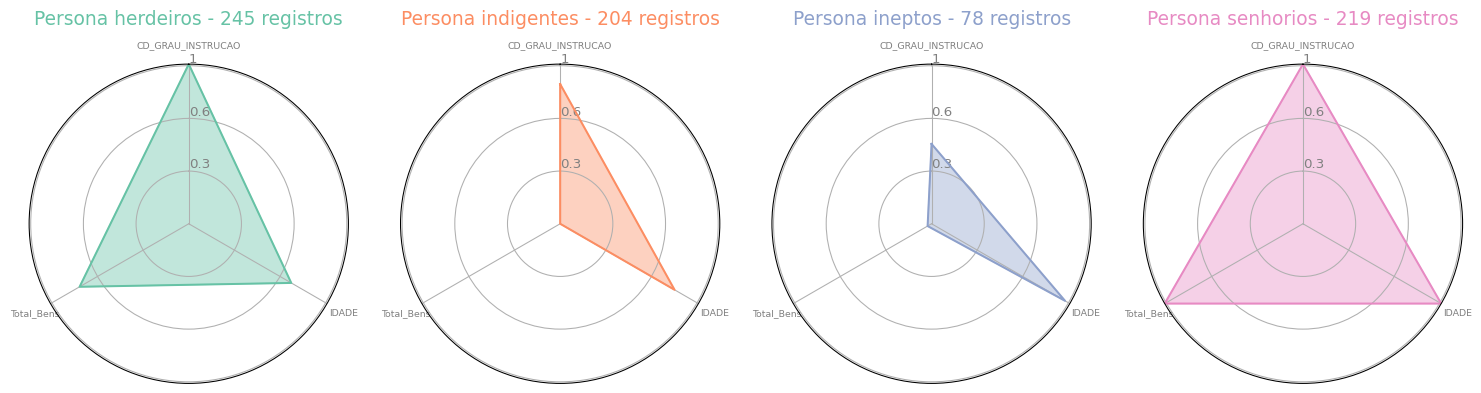

In [ ]:
#retirar as colunas colunasSelecionadasPadronizadas do df_cluster_info
df_cluster_info_view = df_cluster_table.drop(colunasSelecionadasPadronizadas+['Total_Bens_Log'], axis=1)

make_spider(df_cluster_info_view)

In [ ]:

import plotly.express as px

#colunasSelecionadas

# Supondo que 'col_corte' tenha três colunas
fig = px.scatter_3d(df_cluster,
                    x=colunasSelecionadas[0],
                    y=colunasSelecionadas[1],
                    z=colunasSelecionadas[2],
                    color='cluster')

# Salvando o gráfico em um arquivo HTML
fig.write_html("grafico_clusters_3d.html")

# Exibindo o gráfico
fig.show()

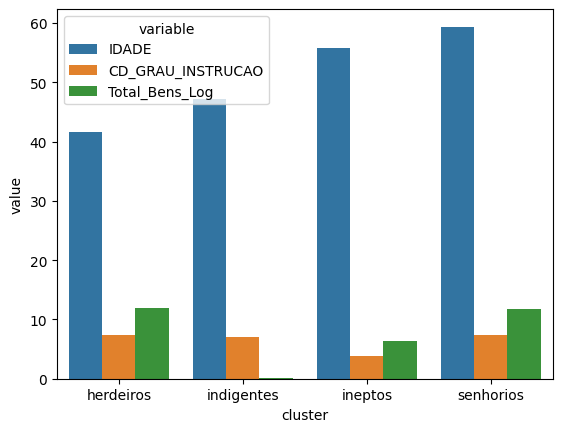

In [ ]:
import seaborn as sns
df_plot = df_cluster.groupby("cluster")[colunasSelecionadas].mean().reset_index()

df_plot_melt = pd.melt(df_plot, id_vars=['cluster'], value_vars= colunasSelecionadas)

sns.barplot(x='cluster', y='value', hue='variable', data=df_plot_melt)
plt.show()

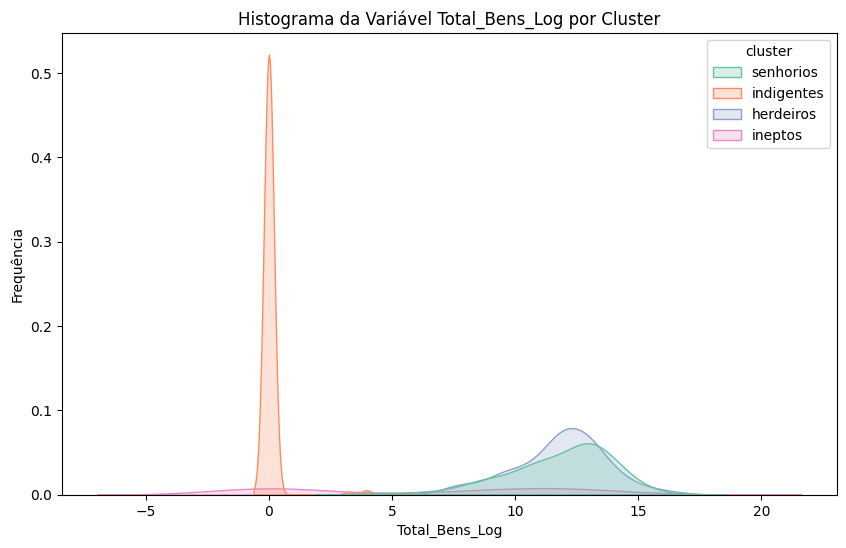

In [ ]:
plt.figure(figsize=(10, 6))
#sns.histplot(data=df_cluster, x='IDADE', hue='cluster', kde=True, element="step", fill=False, bins=20, palette='Set2')
Var = 'Total_Bens_Log'
sns.kdeplot(data=df_cluster, x=Var, hue='cluster', fill=True,  palette='Set2')
plt.title(f'Histograma da Variável {Var} por Cluster')
plt.xlabel(f'{Var}')
plt.ylabel('Frequência')
plt.show()


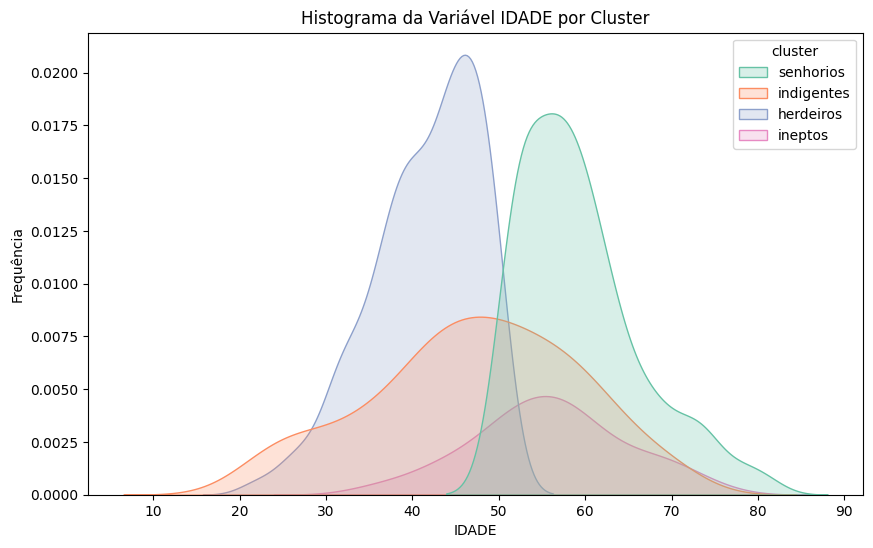

In [ ]:
plt.figure(figsize=(10, 6))
#sns.histplot(data=df_cluster, x='IDADE', hue='cluster', kde=True, element="step", fill=False, bins=20, palette='Set2')
Var = 'IDADE'
sns.kdeplot(data=df_cluster, x=Var, hue='cluster', fill=True,  palette='Set2')
plt.title(f'Histograma da Variável {Var} por Cluster')
plt.xlabel(f'{Var}')
plt.ylabel('Frequência')
plt.show()


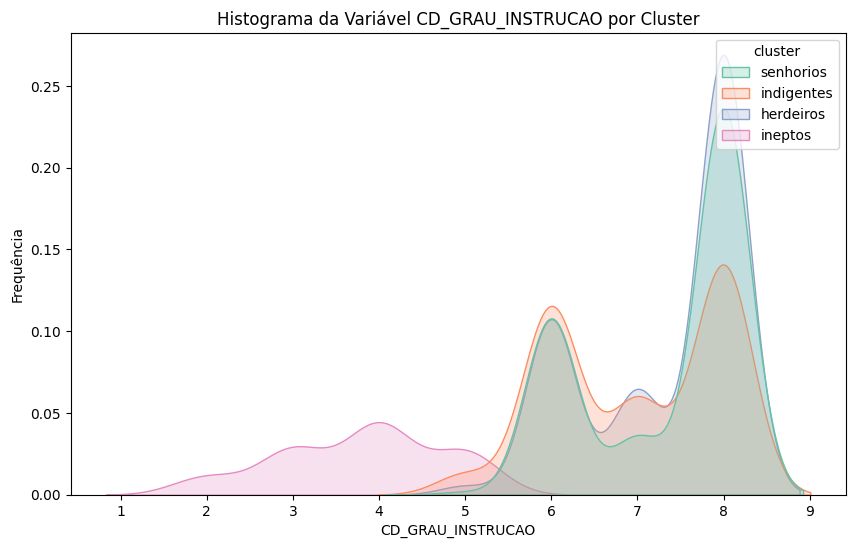

In [ ]:
plt.figure(figsize=(10, 6))
#sns.histplot(data=df_cluster, x='IDADE', hue='cluster', kde=True, element="step", fill=False, bins=20, palette='Set2')
Var = 'CD_GRAU_INSTRUCAO'
sns.kdeplot(data=df_cluster, x=Var, hue='cluster', fill=True,  palette='Set2')
plt.title(f'Histograma da Variável {Var} por Cluster')
plt.xlabel(f'{Var}')
plt.ylabel('Frequência')
plt.show()


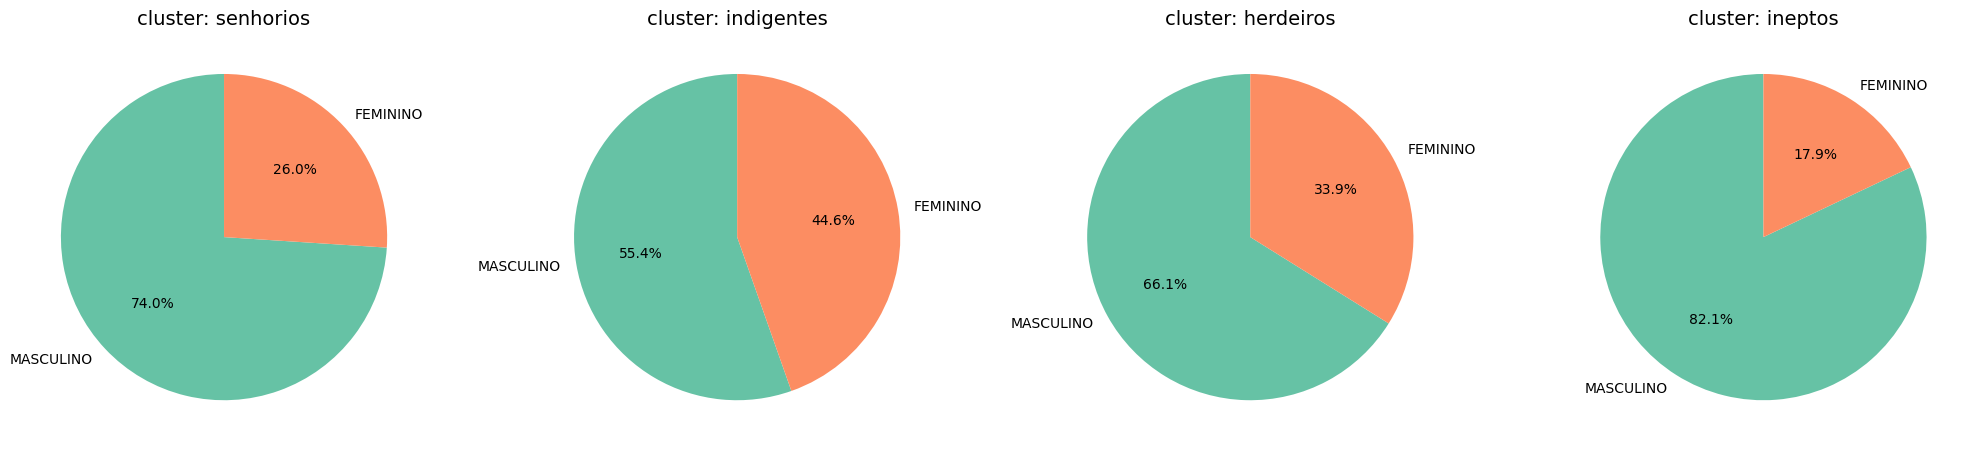

In [ ]:

df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'DS_GENERO'
split_col = 'cluster'
plot_pie_charts(df, category_col, split_col)

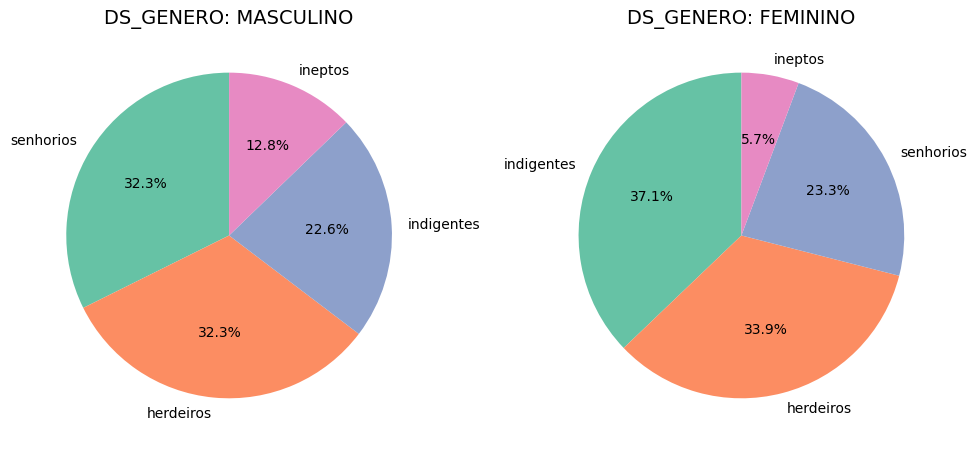

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'cluster'
split_col = 'DS_GENERO'
plot_pie_charts(df, category_col, split_col)

In [ ]:
map_ideologia = {
        'direita': ['PL', 'REPUBLICANOS', 'PRTB', 'NOVO', 'DC', 'PRD'],
        'centro-direita': ['PODE',  'SOLIDARIEDADE', 'AVANTE','UNIÃO','PP', 'AGIR'],
        'centro': ['MDB','PSDB','PSD','CIDADANIA', 'MOBILIZA', 'PMB'],
        'centro-esquerda': ['PSB', 'PDT', 'PV', 'REDE'],
        'esquerda': ['PT', 'PC do B', 'PSOL', 'UP']
    }

def ideologia_do_partido(partido):
    for ideologia, partidos_ideologia in map_ideologia.items():
        if partido in partidos_ideologia:
            return ideologia
    return 'indefinido'
dfVereadorCuritibaBemPadronizadaCluster['IDEOLOGIA'] = dfVereadorCuritibaBemPadronizadaCluster['SG_PARTIDO'].map(ideologia_do_partido)

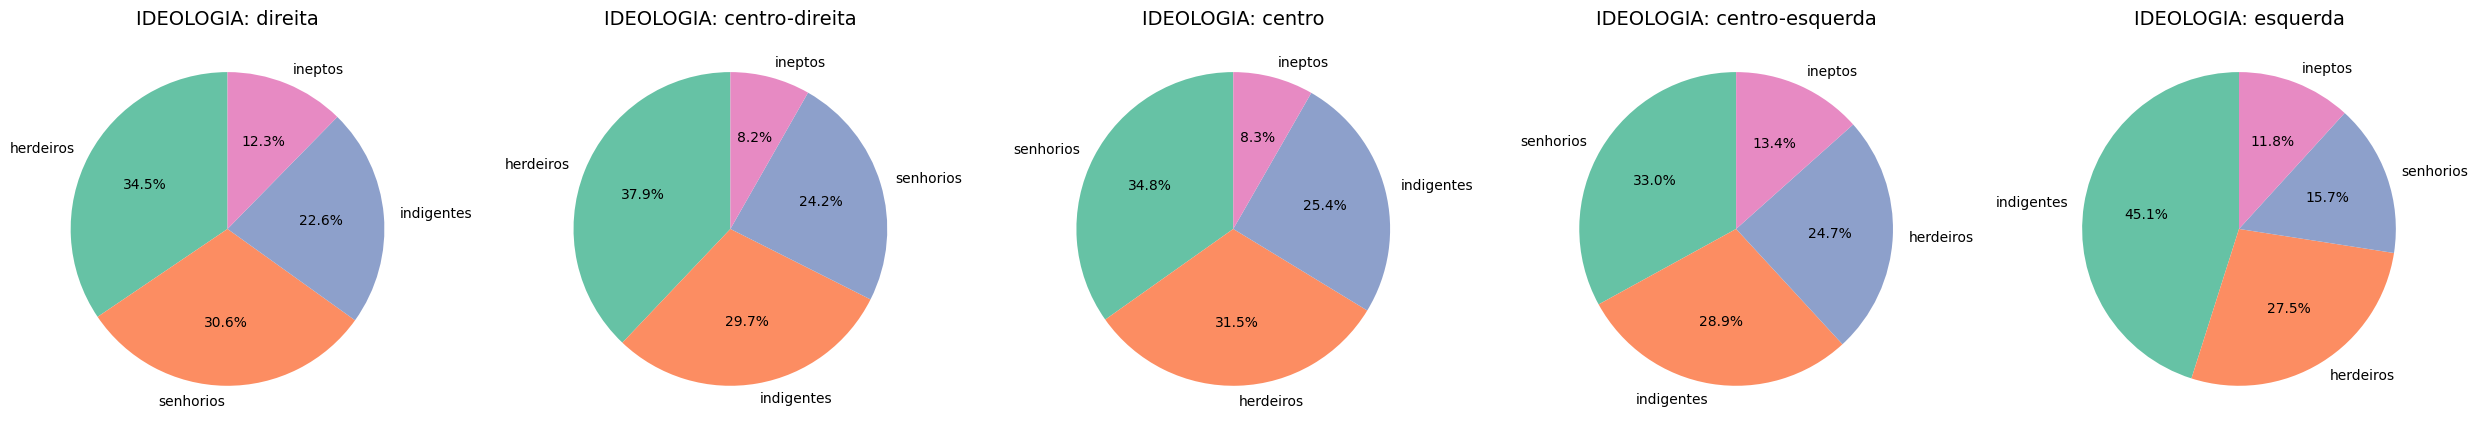

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
df['DS_OCUPACAO_SELECTED'] = df['DS_OCUPACAO'].apply(lambda x: x if x in selected_occupations else 'OUTRAS OCUPAÇÕES')
category_col = 'cluster'
split_col = 'IDEOLOGIA'
plot_pie_charts(df, category_col, split_col)

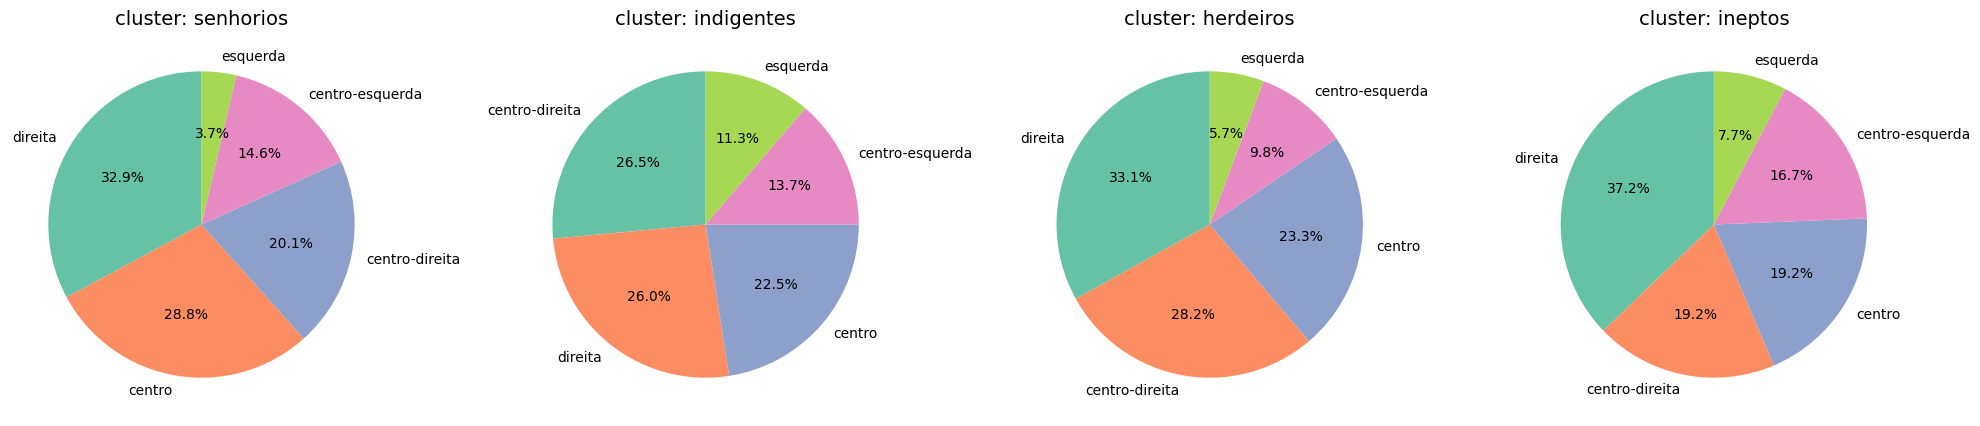

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'IDEOLOGIA'
split_col = 'cluster'
plot_pie_charts(df, category_col, split_col)

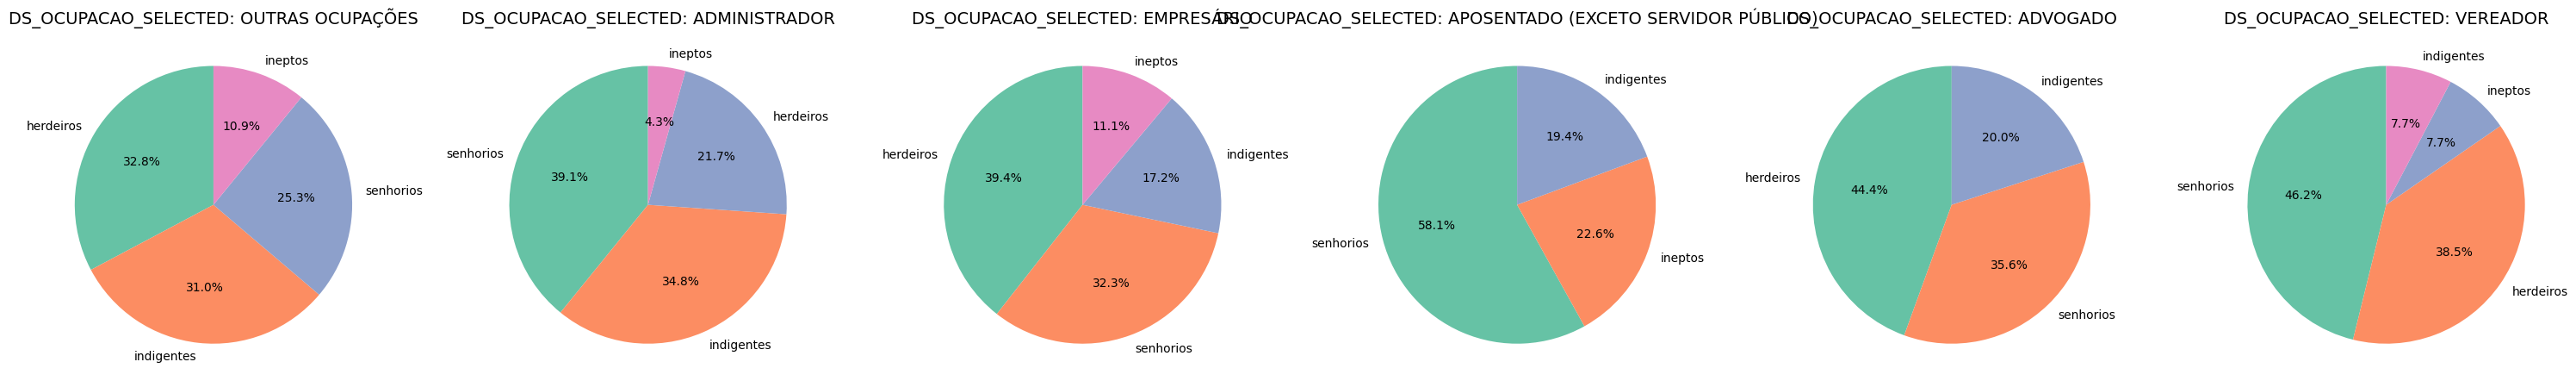

In [ ]:

df = dfVereadorCuritibaBemPadronizadaCluster.copy()
selected_occupations = ["EMPRESÁRIO", "ADVOGADO", "APOSENTADO (EXCETO SERVIDOR PÚBLICO)", "VEREADOR", "ADMINISTRADOR"]
df['DS_OCUPACAO_SELECTED'] = df['DS_OCUPACAO'].apply(lambda x: x if x in selected_occupations else 'OUTRAS OCUPAÇÕES')
category_col = 'cluster'
split_col = 'DS_OCUPACAO_SELECTED'
plot_pie_charts(df, category_col, split_col)


In [ ]:
def categorize_profession(profession):
    categories = {
        'Setor Público': [
            'SERVIDOR PÚBLICO MUNICIPAL', 'SERVIDOR PÚBLICO FEDERAL',
            'SERVIDOR PÚBLICO ESTADUAL', 'SERVIDOR PÚBLICO CIVIL APOSENTADO',
            'VEREADOR', 'POLICIAL MILITAR', 'POLICIAL CIVIL',
            'BOMBEIRO MILITAR', 'AGENTE DE SAÚDE E SANITARISTA',
            'GARI OU LIXEIRO', 'OCUPANTE DE CARGO EM COMISSÃO'
        ],

        'Saúde': [
            'MÉDICO', 'ODONTÓLOGO', 'PSICÓLOGO', 'FARMACÊUTICO',
            'ENFERMEIRO', 'TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)',
            'BIOMÉDICO', 'NUTRICIONISTA E ASSEMELHADOS',
            'FONOAUDIÓLOGO', 'VETERINÁRIO','FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL','MASSAGISTA'
        ],

        'Educação': [
            'PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL',
            'PROFESSOR DE ENSINO FUNDAMENTAL', 'PROFESSOR DE ENSINO MÉDIO',
            'PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS',
            'PROFESSOR DE ENSINO SUPERIOR', 'PEDAGOGO',
            'DIRETOR DE ESTABELECIMENTO DE ENSINO'
        ],

        'Comércio e Serviços': [
            'COMERCIANTE', 'VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS',
            'VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA',
            'REPRESENTANTE COMERCIAL', 'FEIRANTE, AMBULANTE E MASCATE',
            'CABELEIREIRO, BARBEIRO, MANICURE, MAQUILADOR, ESTETICISTA E MASSAGISTA',
            'COZINHEIRO', 'MOTORISTA PARTICULAR', 'FRENTISTA',
            'ALMOXARIFE', 'AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS','ADVOGADO'
        ],

        'Indústria e Tecnologia': [
            'EMPRESÁRIO', 'ANALISTA DE SISTEMAS', 'TÉCNICO EM INFORMÁTICA',
            'MECÂNICO DE MANUTENÇÃO', 'TORNEIRO MECÂNICO', 'ENGENHEIRO',
            'ARQUITETO', 'DESENHISTA', 'SERRALHEIRO',
            'TRABALHADOR DE FABRICAÇÃO DE ROUPAS', 'TÉCNICO DE LABORATÓRIO E RAIOS X'
        ],

        'Agricultura e Pecuária': [
            'PECUARISTA', 'ZOOTECNISTA'
        ],

        'Arte e Mídia': [
            'JORNALISTA E REDATOR', 'MÚSICO', 'CANTOR E COMPOSITOR',
            'FOTÓGRAFO E ASSEMELHADOS', 'PUBLICITÁRIO', 'HISTORIADOR',
            'ESCRITOR E CRÍTICO', 'LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA'
        ],

        'Outros': [
            'DONA DE CASA', 'OUTROS', 'ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS',
            'APOSENTADO (EXCETO SERVIDOR PÚBLICO)', 'MILITAR REFORMADO',
            'AGENTE ADMINISTRATIVO', 'GERENTE', 'OFFICE-BOY E CONTÍNUO',
            'ATLETA PROFISSIONAL E TÉCNICO EM DESPORTOS',
            'MOTORISTA DE VEÍCULOS DE TRANSPORTE DE CARGA',
            'TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA DOMÉSTICA E ADMINISTRAÇÃO',
            'CIENTISTA POLÍTICO', 'TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)',
            'ADMINISTRADOR','CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES','CABELEIREIRO E BARBEIRO',
            'BIÓLOGO','CONTADOR','PROTÉTICO','VIGILANTE','BANCÁRIO E ECONOMIÁRIO','GEÓGRAFO',
            'MEMBRO DAS FORÇAS ARMADAS','PADEIRO, CONFEITEIRO E ASSEMELHADOS','SOCIÓLOGO'

        ]
    }

    for category, professions in categories.items():
        if profession in professions:
            return category
    return 'Não categorizado'

In [ ]:
# Aplicando a função a uma nova coluna chamada 'categoria_profissao'
dfVereadorCuritibaBemPadronizadaCluster['categoria_profissao'] = dfVereadorCuritibaBemPadronizadaCluster['DS_OCUPACAO'].apply(categorize_profession)


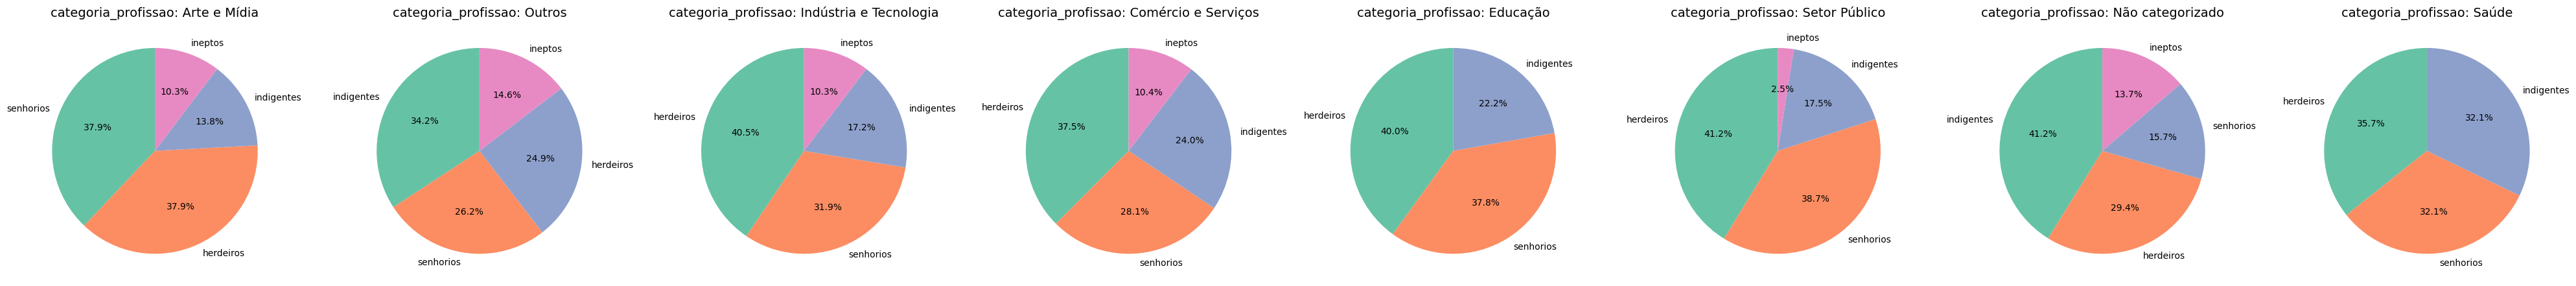

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'cluster'
split_col = 'categoria_profissao'
plot_pie_charts(df, category_col, split_col)

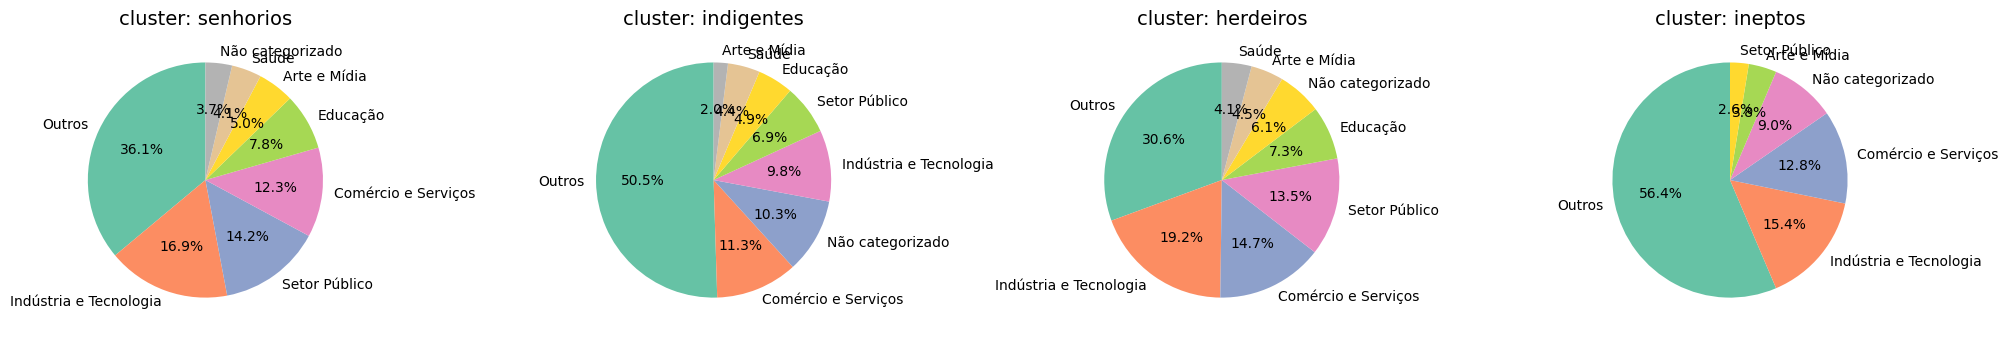

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'categoria_profissao'
split_col = 'cluster'
plot_pie_charts(df, category_col, split_col)

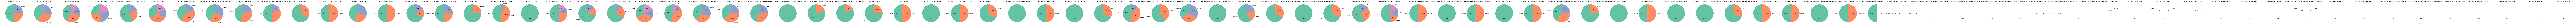

In [ ]:
# prompt: remova a restrinção da coluna DS_OCUPAÇÂO "df = dfVereadorCuritibaBemPadronizadaCluster.copy()
# selected_occupations = ["EMPRESÁRIO", "ADVOGADO", "APOSENTADO (EXCETO SERVIDOR PÚBLICO)", "VEREADOR", "ADMINISTRADOR"]
# df['DS_OCUPACAO_SELECTED'] = df['DS_OCUPACAO'].apply(lambda x: x if x in selected_occupations else 'OUTRAS OCUPAÇÕES')
# category_col = 'cluster'
# split_col = 'DS_OCUPACAO_SELECTED'
# plot_p"

df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'cluster'
split_col = 'DS_OCUPACAO'
plot_pie_charts(df, category_col, split_col)


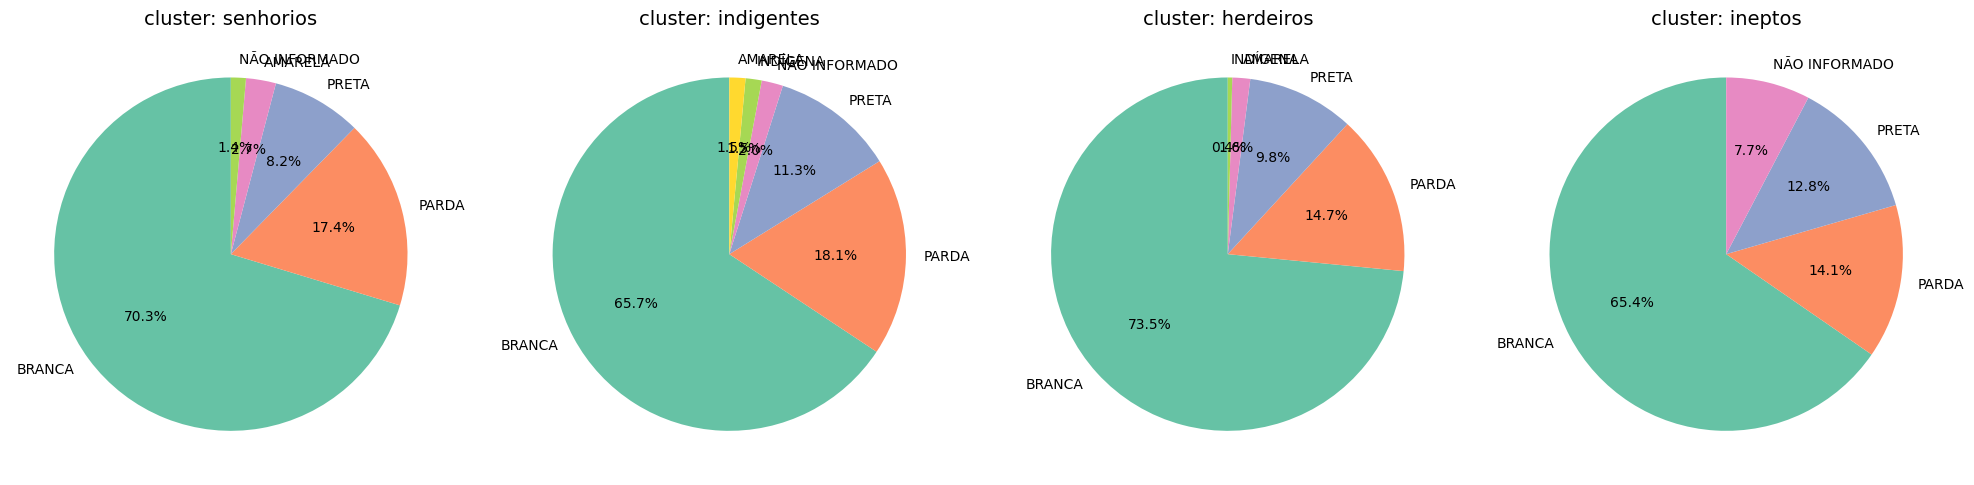

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'DS_COR_RACA'
split_col = 'cluster'
plot_pie_charts(df, category_col, split_col)

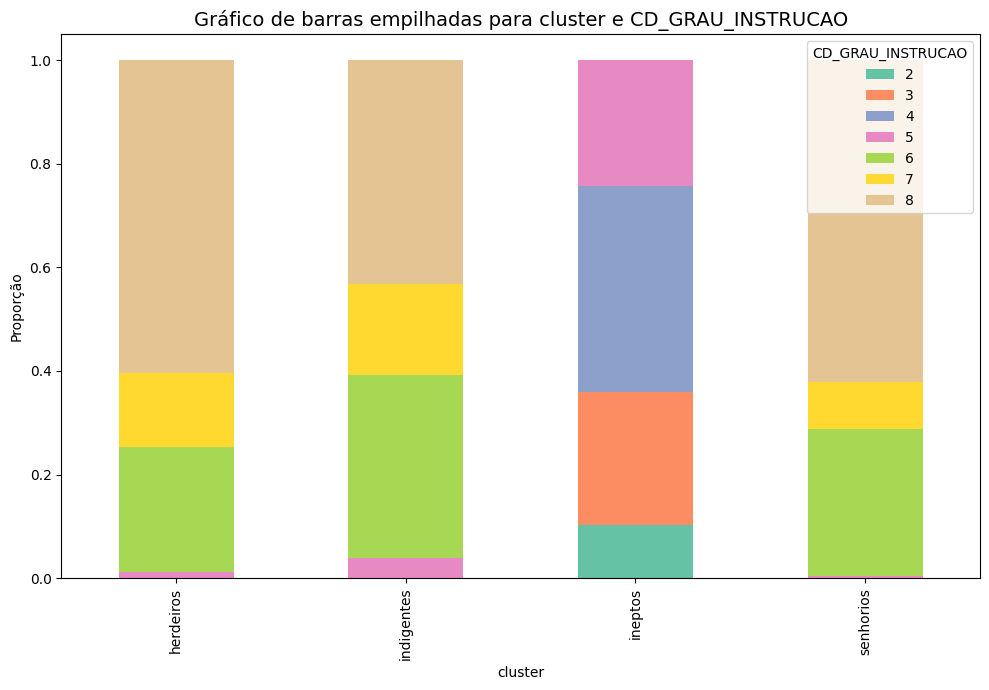

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'CD_GRAU_INSTRUCAO'
split_col = 'cluster'
plot_stacked_bar_chart(df, category_col, split_col, stacked = True)

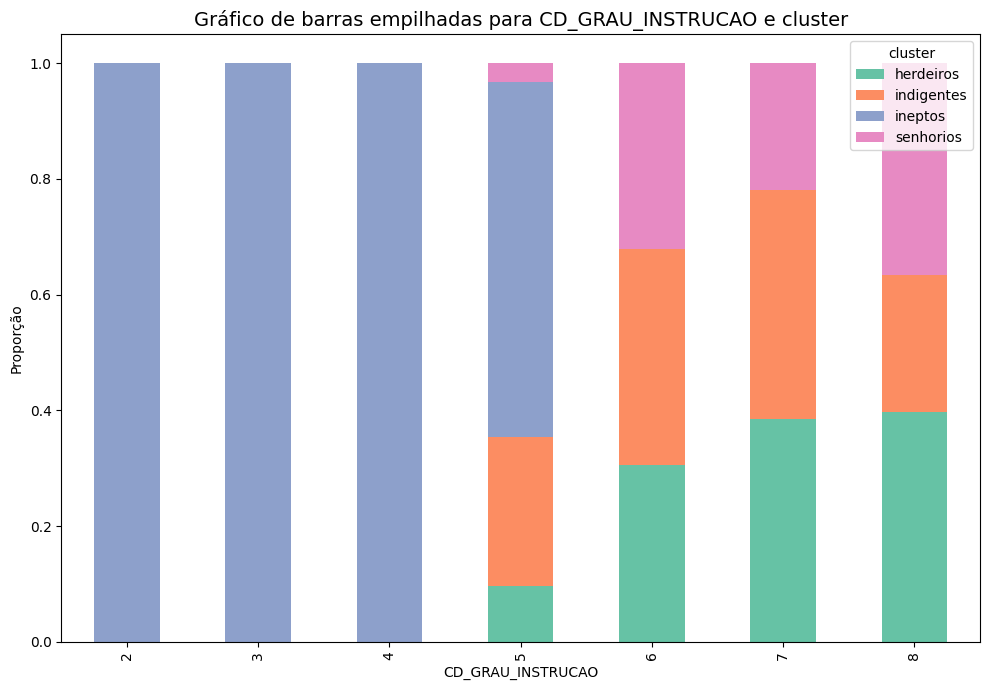

In [ ]:
df = dfVereadorCuritibaBemPadronizadaCluster.copy()
category_col = 'cluster'
split_col = 'CD_GRAU_INSTRUCAO'
plot_stacked_bar_chart(df, category_col, split_col, stacked = True)

<Axes: xlabel='f1', ylabel='f2'>

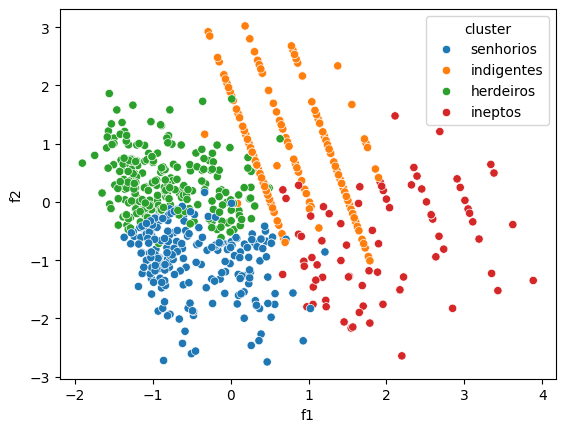

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transform = pca.fit_transform(dfVereadorCuritibaBemPadronizadaCluster[colunasSelecionadasPadronizadas])
df_X_transform = pd.DataFrame(X_transform, columns = ["f1", "f2"])
df_X_transform["cluster"] = df_cluster["cluster"]


sns.scatterplot(data = df_X_transform, x="f1", y="f2", hue="cluster")

In [ ]:
# Gerar uma amostra aleatória de 2% do DataFrame
dfVereadorCuritibaBemPadronizada_amostra = dfVereadorCuritibaBemPadronizadaCluster.sample(frac=0.05, random_state=42)

# Exibir a amostra obtida
dfVereadorCuritibaBemPadronizada_amostra.shape  # Exibe as primeiras linhas da amostra

(37, 97)

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supondo df_normalized como seu DataFrame normalizado

# Faixas de parâmetros para experimentar
eps_values = np.arange(0.1, 1.3 , 0.2)  # Varia de 0.1 a 1.5 com passo de 0.1
min_samples_values = np.arange(25, 50, 25)  # Varia de 2 a 9

# Variáveis para armazenar os melhores resultados
best_score = -1
best_eps = 0
best_min_samples = 0

# Lista para armazenar os resultados
results = []


df_train = dfVereadorCuritibaBemPadronizada[colunasSelecionadasPadronizadas].copy()

# Testando combinações de parâmetros
for eps in tqdm(eps_values):
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_train)
        # Verifica se foi encontrado mais de 1 cluster e menos que o número de pontos (excluindo ruído)
        if len(set(labels)) > 1 and len(set(labels)) < len(df_train):
            score = silhouette_score(df_train, labels)
            results.append((eps, min_samples, score))
            print(f'eps: {eps}, min_samples: {min_samples}, score: {score}')

            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Melhor Silhueta: {best_score}')
print(f'Melhor eps: {best_eps}')
print(f'Melhor min_samples: {best_min_samples}')

# Convertendo os resultados para um DataFrame
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

import plotly.graph_objects as go


# Criando o gráfico 3D
fig = go.Figure(data=[go.Scatter3d(
    x=results_df['eps'],
    y=results_df['min_samples'],
    z=results_df['silhouette_score'],
    mode='markers',
    marker=dict(
        size=5,
        color=results_df['silhouette_score'],  # Cor dos pontos baseada na pontuação de Silhueta
        colorscale='Viridis',  # Esquema de cores
        opacity=0.8
    )
)])

# Atualizando os títulos dos eixos
fig.update_layout(
    scene=dict(
        xaxis_title='EPS',
        yaxis_title='Min Samples',
        zaxis_title='Silhouette Score'
    ),
    title='DBSCAN Parameter Tuning Results'
)

# Mostrar o gráfico
fig.show()

100%|██████████| 6/6 [00:00<00:00, 41.79it/s]

eps: 0.30000000000000004, min_samples: 25, score: 0.05058553030252463
eps: 0.5000000000000001, min_samples: 25, score: 0.09910911703915645
eps: 0.7000000000000001, min_samples: 25, score: 0.1982763954368488
eps: 0.9000000000000001, min_samples: 25, score: 0.3825859675287807
eps: 1.1000000000000003, min_samples: 25, score: 0.4116555209454841
Melhor Silhueta: 0.4116555209454841
Melhor eps: 1.1000000000000003
Melhor min_samples: 25


In [ ]:
db = DBSCAN(eps=best_eps, min_samples=best_min_samples)

df_predict_DB = df_train = dfVereadorCuritibaBemPadronizada[colunasSelecionadasPadronizadas].copy()


df_predict_DB["cluster"] = db.fit_predict(df_predict_DB)
df_predict_DB["cluster"] = [chr(x+66) for x in df_predict_DB.cluster]

df_cluster_info_DB = df_predict_DB.groupby("cluster").median().reset_index()
df_cluster_count_DB = df_predict_DB.groupby("cluster").count()[colunasSelecionadasPadronizadas[0]].reset_index()
df_cluster_count_DB.columns = ["cluster", "count"]

df_cluster_table_DB = pd.merge(df_cluster_info_DB, df_cluster_count_DB, how="left", on="cluster")
df_cluster_table_DB

,cluster,IDADE_PADRONIZADA,CD_GRAU_INSTRUCAO_PADRONIZADA,Total_Bens_Log_PADRONIZADA,count
0,A,0.367138,-3.463573,-0.540145,15
1,B,0.015101,0.802512,0.461837,731


# **HIERÁRQUICO**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Choose a distance metric (e.g., Euclidean distance)
distance_matrix = dfVereadorCuritibaBemPadronizada_amostra[colunasSelecionadasPadronizadas].values

# Choose a linkage method (e.g., Ward's method)
linkage_method = "ward"

# Perform hierarchical clustering
clusters = linkage(distance_matrix, method=linkage_method)

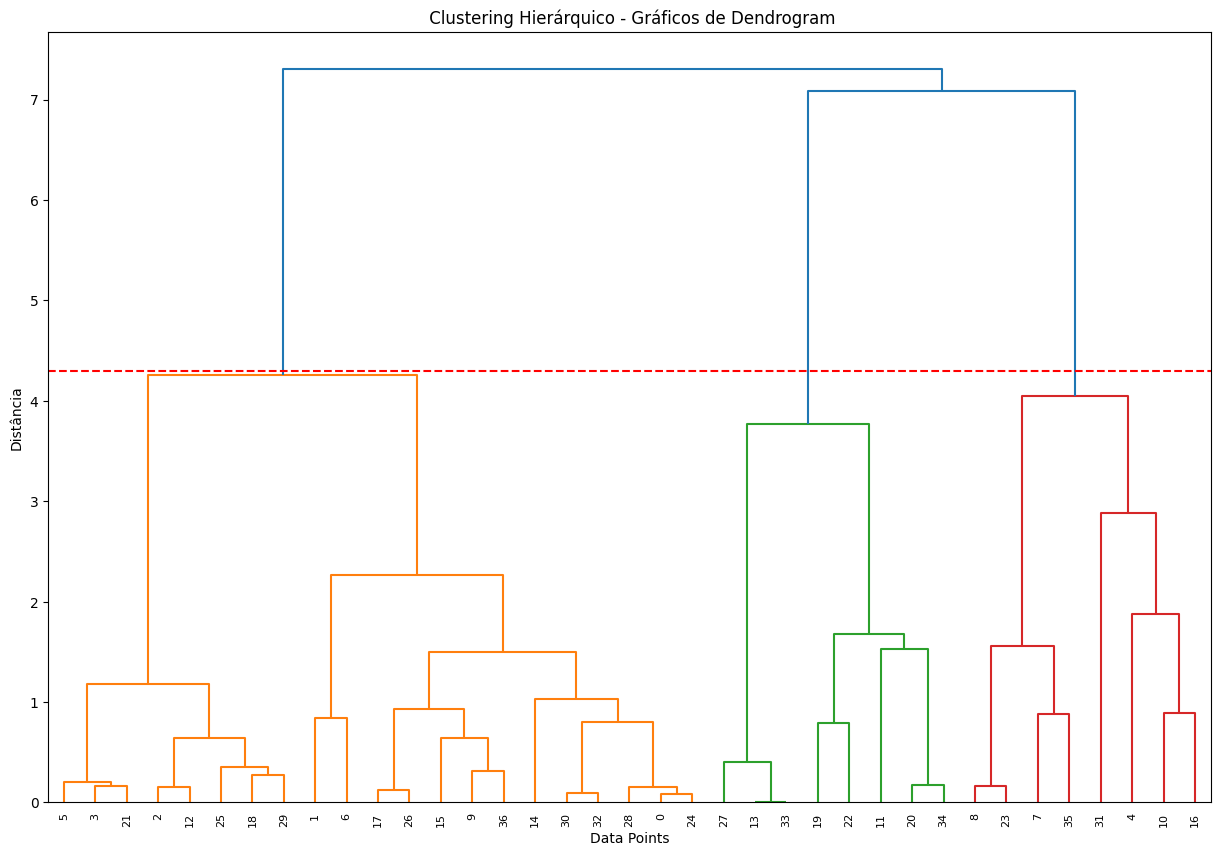

In [ ]:
# Create a dendrogram
plt.figure(figsize=(15, 10))
plt.title(' Clustering Hierárquico - Gráficos de Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distância')
dendrogram(clusters, show_leaf_counts=True, leaf_rotation=90)

# Adicione uma linha horizontal vermelha na altura
cutoff_distance = 4.3
plt.axhline(y=cutoff_distance, color='r', linestyle='--')

plt.show()

In [ ]:
Hclusters = fcluster(clusters, cutoff_distance, criterion='distance')

In [ ]:


df_predict_Hcl = dfVereadorCuritibaBemPadronizada_amostra[colunasSelecionadas+colunasSelecionadasPadronizadas+['Total_Bens']].copy()
df_predict_Hcl["cluster"] = Hclusters
df_predict_Hcl["cluster"] = [chr(x+66) for x in df_predict_Hcl.cluster]

df_cluster_info_Hcl = df_predict_Hcl.groupby("cluster").median().reset_index()
df_cluster_count_Hcl = df_predict_Hcl.groupby("cluster").count()[colunasSelecionadasPadronizadas[0]].reset_index()
df_cluster_count_Hcl.columns = ["cluster", "count"]

df_cluster_table_Hcl = pd.merge(df_cluster_info_Hcl, df_cluster_count_Hcl, how="left", on="cluster")
df_cluster_table_Hcl

,cluster,IDADE,CD_GRAU_INSTRUCAO,Total_Bens_Log,IDADE_PADRONIZADA,CD_GRAU_INSTRUCAO_PADRONIZADA,Total_Bens_Log_PADRONIZADA,Total_Bens,count
0,C,46.0,8.0,11.918397,-0.336937,0.802512,0.681532,150000.0,21
1,D,49.0,7.0,0.000000,-0.072909,0.091498,-1.414172,0.0,8
2,E,60.5,6.0,10.809702,0.939200,-0.619516,0.486582,62250.0,8


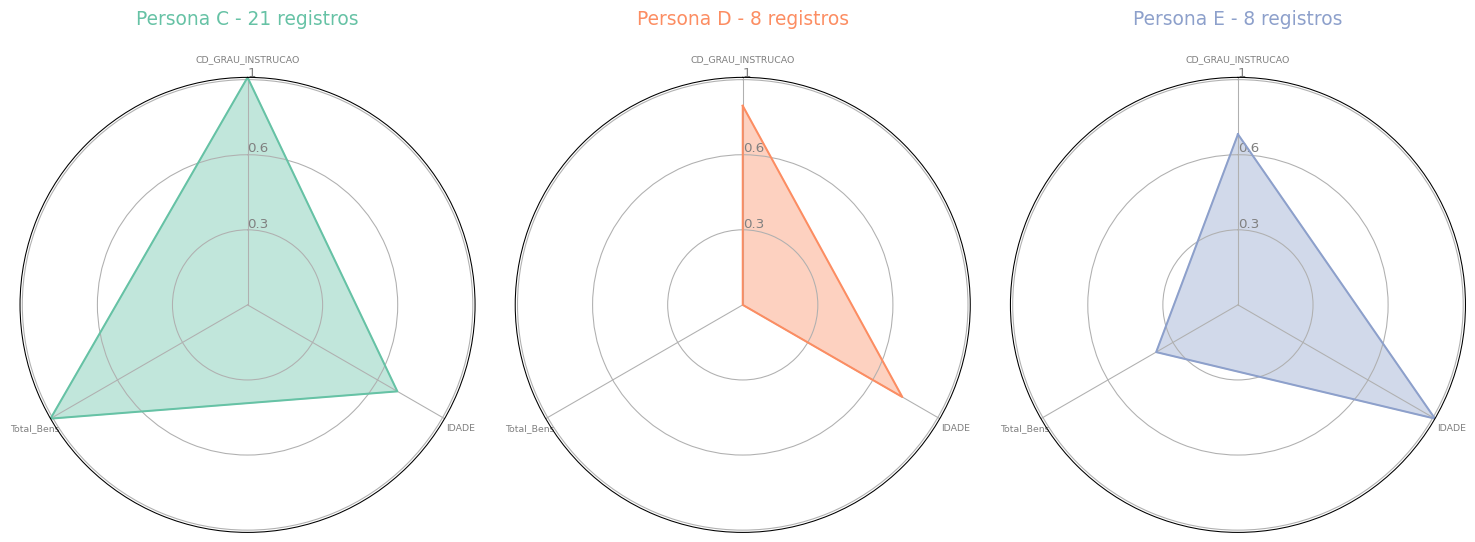

In [ ]:
#retirar as colunas colunasSelecionadasPadronizadas do df_cluster_info
df_cluster_info_view_Hcl = df_cluster_table_Hcl.drop(colunasSelecionadasPadronizadas + ['Total_Bens_Log'], axis=1)
#df_cluster_info_view = df_cluster_info.drop(colunasSelecionadasPadronizadas+['Total_Bens_Log'], axis=1)


#df_cluster_info.head()

make_spider(df_cluster_info_view_Hcl)

In [ ]:
# prompt: realize uma contagem de cada coluna do database df_cluster_info_view_Hcl

# Realizar a contagem de cada coluna do DataFrame df_cluster_info_view_Hcl
for column in df_cluster_info_view_Hcl.columns:
  counts = df_cluster_info_view_Hcl[column].value_counts()
  print(f"Contagem da coluna '{column}':\n{counts}\n")


NameError: name 'df_cluster_info_view_Hcl' is not defined

# **teste**